In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('./Mall_Customers.csv')
print(data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [25]:
linked = linkage(X, 'average')

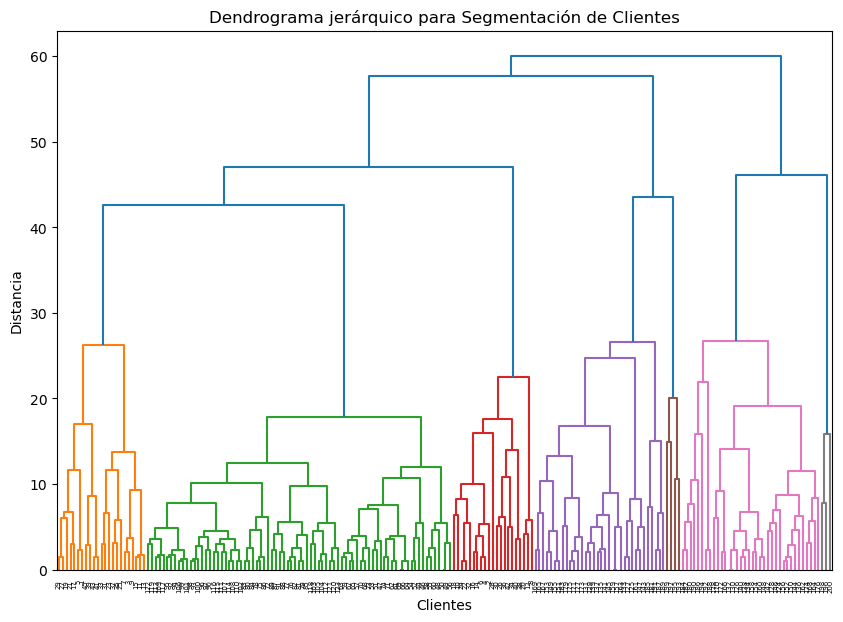

In [26]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=data['CustomerID'].astype(str).values,  
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma jerárquico para Segmentación de Clientes')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

In [29]:
n_clusters = 5  
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
clustering.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [30]:
silhouette_avg = silhouette_score(X, clustering.labels_)
print(f"Coeficiente de Silueta: {silhouette_avg}")

Coeficiente de Silueta: 0.4791911539647448


In [31]:
calinski_harabasz = calinski_harabasz_score(X, clustering.labels_)
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

Índice Calinski-Harabasz: 143.4210203217367


In [32]:
data['Cluster'] = clustering.labels_


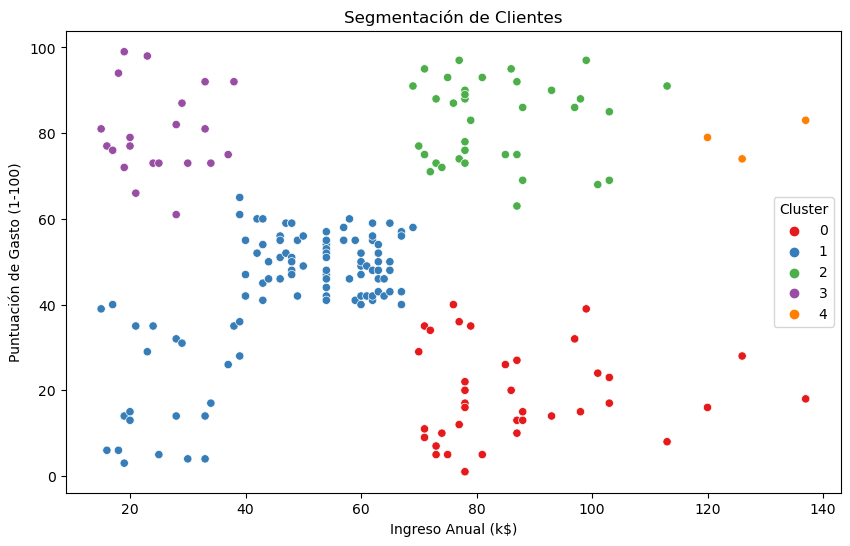

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', legend='full')
plt.title('Segmentación de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()